In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import skimage
from skimage.io import imread, imshow
from skimage.color import rgb2gray, rgb2hsv
from skimage.measure import label, regionprops, regionprops_table
from skimage.filters import threshold_otsu
from scipy.ndimage import median_filter
from matplotlib.patches import Rectangle
from tqdm import tqdm

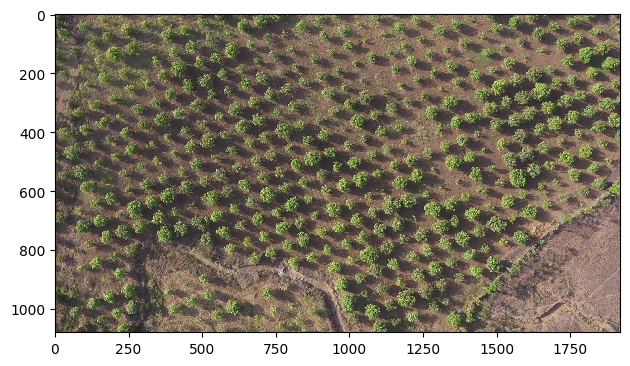

In [2]:
tree = imread(r'D:\pictures\df1.jpg')
imshow(tree);

In [3]:
tree

array([[[ 88,  88,  60],
        [104, 104,  76],
        [112, 113,  82],
        ...,
        [106,  89,  81],
        [113,  96,  88],
        [121, 104,  96]],

       [[100, 100,  72],
        [117, 117,  89],
        [120, 120,  92],
        ...,
        [100,  83,  75],
        [ 99,  82,  74],
        [101,  84,  76]],

       [[117, 117,  91],
        [135, 135, 107],
        [132, 132, 104],
        ...,
        [125, 108, 101],
        [119, 102,  95],
        [115,  98,  91]],

       ...,

       [[120, 117, 100],
        [121, 118, 101],
        [131, 128, 113],
        ...,
        [152, 136, 121],
        [151, 135, 122],
        [150, 134, 121]],

       [[124, 121, 104],
        [131, 128, 111],
        [141, 138, 123],
        ...,
        [163, 146, 130],
        [164, 146, 132],
        [161, 143, 129]],

       [[ 96,  93,  76],
        [104, 101,  84],
        [112, 109,  94],
        ...,
        [170, 153, 137],
        [171, 153, 139],
        [166, 148, 134]]

In [4]:
tree_gray = rgb2gray(tree)

In [5]:
tree_gray


array([[0.33718118, 0.39992627, 0.43353882, ..., 0.36092431, 0.38837529,
        0.41974784],
       [0.38424   , 0.45090667, 0.46267137, ..., 0.3373949 , 0.33347333,
        0.34131647],
       [0.45147216, 0.5214949 , 0.5097302 , ..., 0.43571686, 0.41218745,
        0.39650118],
       ...,
       [0.45651686, 0.46043843, 0.50021961, ..., 0.54242549, 0.53906941,
        0.53514784],
       [0.47220314, 0.49965412, 0.53943529, ..., 0.58219176, 0.58359059,
        0.57182588],
       [0.36239922, 0.39377176, 0.4257098 , ..., 0.60964275, 0.61104157,
        0.59143373]])

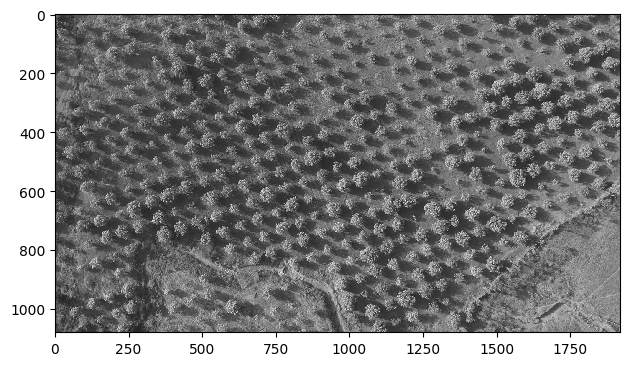

In [6]:
imshow(tree_gray)

In [7]:
tree.shape

(1080, 1920, 3)

In [8]:
tree.shape[0]

1080

In [9]:
tree.shape[1]

1920

In [10]:
otsu_thresh = threshold_otsu(tree_gray)

In [11]:
otsu_thresh

0.4028658363970588

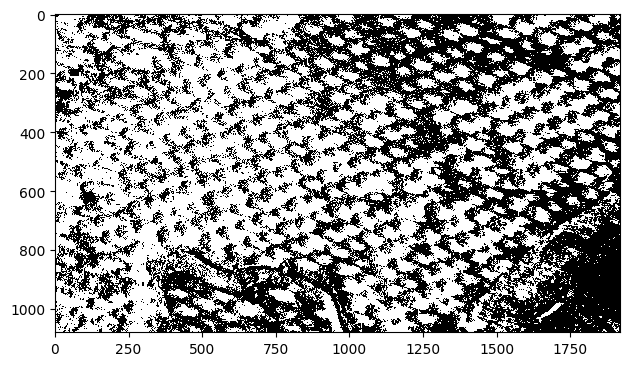

In [12]:

tree_binary = tree_gray < otsu_thresh
imshow(tree_binary, cmap = 'gray');

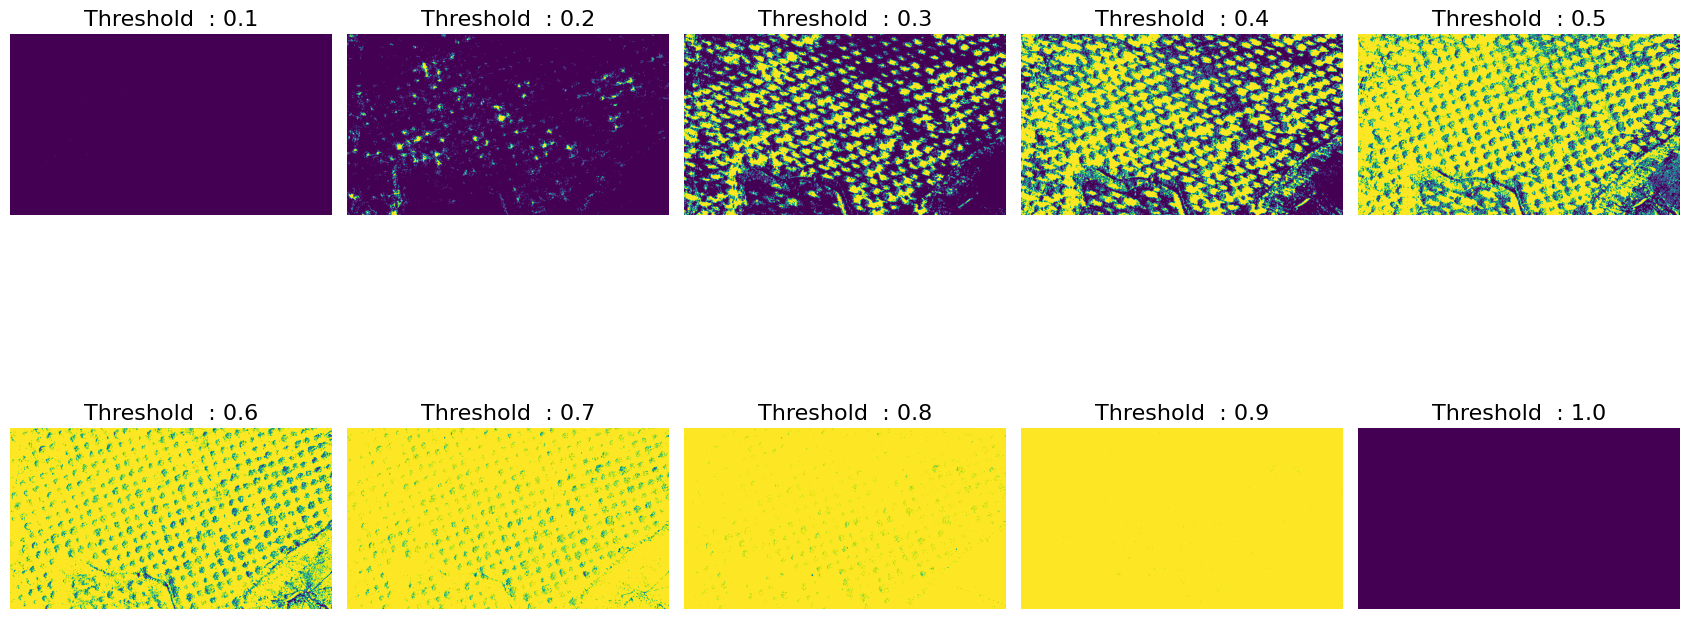

In [13]:
def threshold_checker(image):
    thresholds =  np.arange(0.1,1.1,0.1)
    tree_gray = rgb2gray(image)
    fig, ax = plt.subplots(2, 5, figsize=(17, 10))
    for n, ax in enumerate(ax.flatten()):
        ax.set_title(f'Threshold  : {round(thresholds[n],2)}',      
                       fontsize = 16)
        threshold_tree = tree_gray < thresholds[n]
        ax.imshow(threshold_tree);
        ax.axis('off')
    fig.tight_layout()
threshold_checker(tree)

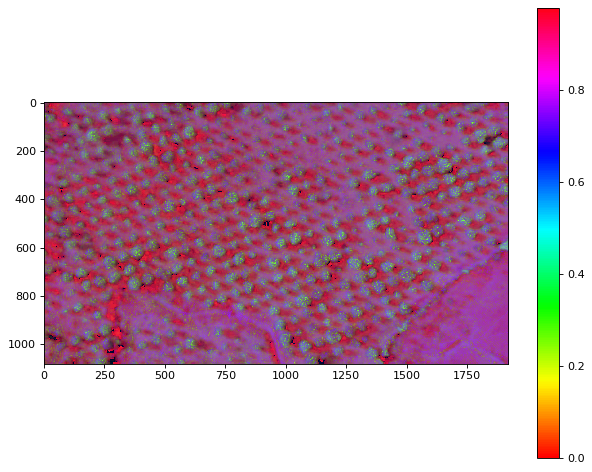

In [14]:

tree_hsv = rgb2hsv(tree[:,:,::-1])
plt.figure(num=None, figsize=(8, 6), dpi=80)
plt.imshow(tree_hsv[:,:,0], cmap='hsv')
plt.colorbar();
imshow(tree_hsv)

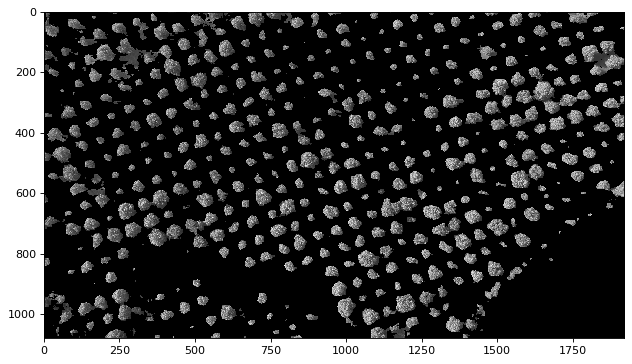

In [15]:
lower_mask = tree_hsv [:,:,0] > 0.2
upper_mask = tree_hsv [:,:,0] <=0.5
#value_mask = tree_hsv [:,:,2] < .90
mask = upper_mask*lower_mask
#mask=median_filter(upper_mask*lower_mask*value_mask, 10)
red = tree[:,:,1]*mask
green = tree[:,:,1]*mask
blue = tree[:,:,1]*mask
tree_mask = np.dstack((red,green,blue))
plt.figure(num=None, figsize=(8, 6), dpi=80)
imshow(tree_mask);

In [16]:
lower_mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [17]:
upper_mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [18]:
mask

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [19]:
red

array([[ 88, 104, 113, ...,   0,   0,   0],
       [100, 117, 120, ...,   0,   0,   0],
       [117, 135, 132, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [20]:
tree_mask

array([[[ 88,  88,  88],
        [104, 104, 104],
        [113, 113, 113],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[100, 100, 100],
        [117, 117, 117],
        [120, 120, 120],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[117, 117, 117],
        [135, 135, 135],
        [132, 132, 132],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

C:\Users\Naveen\AppData\Roaming\Python\Python310\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


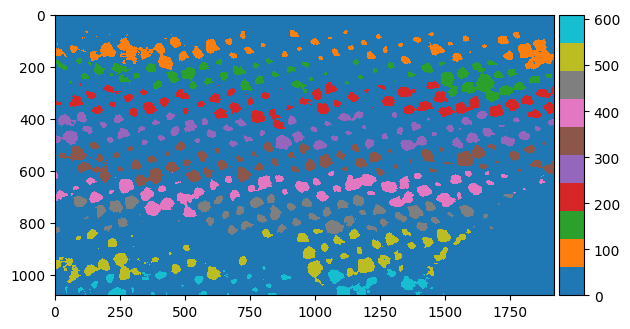

In [21]:
tree_blobs = label(rgb2gray(tree_mask) > 0)
imshow(tree_blobs, cmap = 'tab10');

In [22]:
properties =['area','label','bbox','convex_area','bbox_area',
             'major_axis_length', 'minor_axis_length',
             'eccentricity']
df = pd.DataFrame(regionprops_table(tree_blobs, properties = properties))


In [23]:
df

,area,label,bbox-0,bbox-1,bbox-2,bbox-3,convex_area,bbox_area,major_axis_length,minor_axis_length,eccentricity
0,2054,1,0,0,85,50,3034,4250,86.217929,42.046838,0.873022
1,252,2,0,213,11,244,273,341,33.505370,10.568004,0.948955
2,157,3,0,410,7,436,167,182,28.177623,7.401115,0.964889
3,90,4,0,470,6,490,96,120,20.258452,6.039463,0.954528
4,16,5,0,516,2,524,16,16,9.165151,2.000000,0.975900
...,...,...,...,...,...,...,...,...,...,...,...
605,64,606,1071,660,1080,668,67,72,9.328388,8.941036,0.285173
606,269,607,1071,817,1080,852,287,315,37.152401,9.749194,0.964956
607,17,608,1072,116,1080,119,20,24,9.495591,2.345541,0.969012
608,1,609,1072,123,1073,124,1,1,0.000000,0.000000,0.000000


100%|███████████████████████████████████████████████████████████████████████████████| 610/610 [00:00<00:00, 815.58it/s]


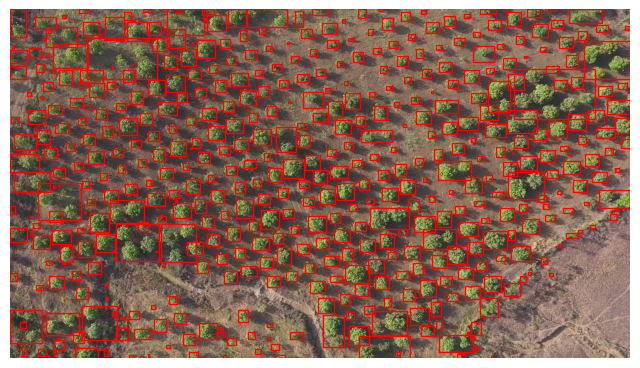

In [24]:
blob_coordinates = [(row['bbox-0'],row['bbox-1'],
                     row['bbox-2'],row['bbox-3'] )for 
                    index, row in df.iterrows()]
fig, ax = plt.subplots(1,1, figsize=(8, 6), dpi = 100)
for blob in tqdm(blob_coordinates):
    width = blob[3] - blob[1]
    height = blob[2] - blob[0]
    patch = Rectangle((blob[1],blob[0]), width, height, 
                       edgecolor='r', facecolor='none')
    ax.add_patch(patch)
ax.imshow(tree);
ax.set_axis_off()